In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

print(data.target_names)


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
categories = [
    'talk.religion.misc',
    'soc.religion.christian',
    'sci.space',
    'comp.graphics'
]#اخذت جذء من الداتا
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [3]:
train.target

array([2, 2, 1, ..., 2, 3, 1])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer#بتقسم الكلام لي ماتركس وتشوف كل كلمه جت كام مره مع كل سبجكت
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt



الدقة: 0.8016759776536313


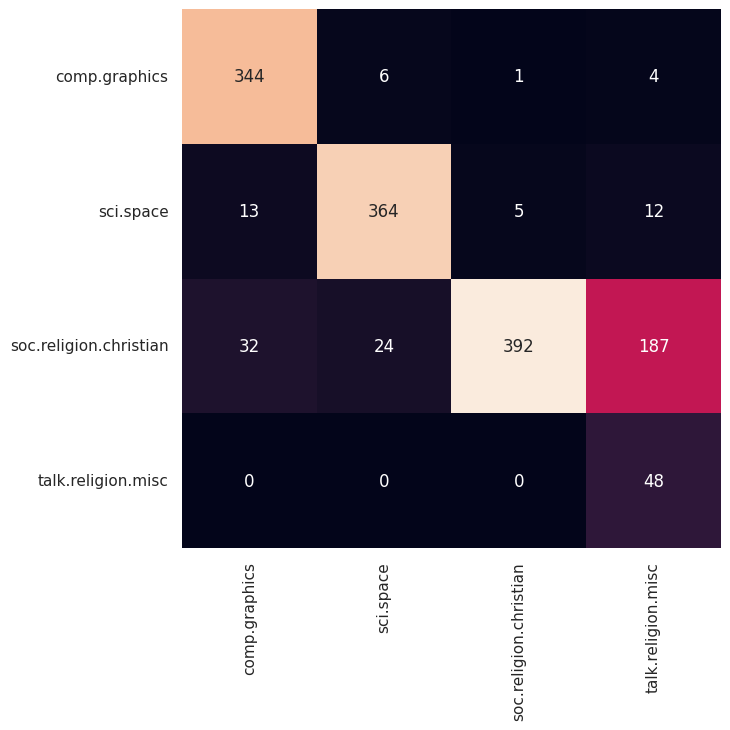

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("الدقة:", accuracy_score(test.target, labels))

mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(10, 7))

sns.heatmap(mat.T,
           square=True,
           annot=True,
           fmt='d',
           cbar=False,
           xticklabels=train.target_names,
           yticklabels=train.target_names)


plt.show()

In [20]:
def predict_category(s):
    pred = model.predict([s])
    return train.target_names[pred[0]]


predict_category('determining the screen resolution')

'comp.graphics'

In [21]:
predict_category('sending a payload to the ISS')

'sci.space'

In [22]:
predict_category('discussing islam vs atheism')



'soc.religion.christian'